In [1]:
import ILRS_Uncertainty as unc
import truth_request as tr
import orekit
import random
from orekit.pyhelpers import  setup_orekit_curdir

In [2]:
from imp import reload

In [3]:
import numpy as np

In [4]:
orekit_vm = orekit.initVM()
setup_orekit_curdir("/Users/gkeramidas/Projects/learning/leolabs-config-data-dynamic/")

In [270]:
end_epoch = [2021,11,30] # epoch from which we will go back certain number of days
length_of_search = 30
prov1 = "hts"
prov2 = "sgf"

end_year = end_epoch[0]
end_month = end_epoch[1]
end_day = end_epoch[2]

In [271]:
leolabs_id = 'L5011'

In [272]:
base_year, base_month, base_day = unc.base_date([end_year, end_month, end_day], length_of_search) # base epoch from where our comparisons begin

In [273]:
print(base_year,base_month,base_day)

2021 10 30


In [275]:
directory = tr.set_up_truth_directory_for_target(leolabs_id)+"/"
tr.dwld_data_for_target(leolabs_id, end_epoch, length_of_search)

info Syncing ILRS truth data from S3 (135 files downloaded)


In [276]:
ephemerides = unc.truth_ephems_from_directory(directory)

In [277]:
for ephem in ephemerides:
    print(ephem.name)

stella_cpf_211107_8111.hts
stella_cpf_211120_8241.hts
stella_cpf_211128_8321.sgf
stella_cpf_211119_8231.hts
stella_cpf_211031_31601.dgf
stella_cpf_211101_8051.sgf
stella_cpf_211126_8301.sgf
stella_cpf_211111_8162.dgf
stella_cpf_211110_8162.dgf
stella_cpf_211109_8131.hts
stella_cpf_211117_8211.hts
stella_cpf_211123_8271.dgf
stella_cpf_211130_8341.hts
stella_cpf_211114_8181.dgf
stella_cpf_211027_8001.dgf
stella_cpf_211110_8161.dgf
stella_cpf_211111_8161.dgf
stella_cpf_211111_8151.sgf
stella_cpf_211028_8011.sgf
stella_cpf_211029_8021.dgf
stella_cpf_211110_8141.sgf
stella_cpf_211115_8191.dgf
stella_cpf_211106_31602.dgf
stella_cpf_211122_8261.dgf
stella_cpf_211106_8162.dgf
stella_cpf_211107_8162.dgf
stella_cpf_211116_8201.hts
stella_cpf_211030_8031.sgf
stella_cpf_211031_8161.dgf
stella_cpf_211108_8121.hts
stella_cpf_211118_8221.hts
stella_cpf_211106_31601.dgf
stella_cpf_211129_8331.sgf
stella_cpf_211121_8251.hts
stella_cpf_211106_8101.hts
stella_cpf_211107_8161.dgf
stella_cpf_211106_8161.dg

In [281]:
reload(unc)

<module 'ILRS_Uncertainty' from '/Users/gkeramidas/Projects/learning/ILRS_Uncertainty.py'>

In [279]:
dX1, dX2, dY1, dY2, dZ1, dZ2 = unc.compare_eph(ephemerides, base_year, base_month, base_day, length_of_search, prov1, prov2)

hts: stella_cpf_211030_8031.hts
sgf: stella_cpf_211030_8031.sgf
checked mean
next month: 11
next day: 1
hts: stella_cpf_211101_8051.hts
sgf: stella_cpf_211101_8051.sgf
checked mean
next month: 11
next day: 2
hts: stella_cpf_211102_8061.hts
sgf: stella_cpf_211102_8061.sgf
checked mean
next month: 11
next day: 3
hts: stella_cpf_211103_8071.hts
sgf: stella_cpf_211103_8071.sgf
checked mean
next month: 11
next day: 4
hts: stella_cpf_211104_8081.hts
sgf: stella_cpf_211104_8081.sgf
checked mean
next month: 11
next day: 5
hts: stella_cpf_211105_8091.hts
sgf: stella_cpf_211105_8091.sgf
checked mean
next month: 11
next day: 6
hts: stella_cpf_211106_8101.hts
sgf: stella_cpf_211106_8101.sgf
checked mean
next month: 11
next day: 7
hts: stella_cpf_211107_8111.hts
sgf: stella_cpf_211107_8111.sgf
checked mean
next month: 11
next day: 8
hts: stella_cpf_211108_8121.hts
sgf: stella_cpf_211108_8121.sgf
checked mean
next month: 11
next day: 9
hts: stella_cpf_211109_8131.hts
sgf: stella_cpf_211109_8131.sgf


In [285]:
uncX1 = unc.final_uncertainty(dX1)
print("dX" + prov1 + "=",uncX1)
uncX2 = unc.final_uncertainty(dX2)
print("dX" + prov2 + "=",uncX2)
uncY1 = unc.final_uncertainty(dY1)
print("dY" + prov1 + "=",uncY1)
uncY2 = unc.final_uncertainty(dY2)
print("dY" + prov2 + "=",uncY2)
uncZ1 = unc.final_uncertainty(dZ1)
print("dZ" + prov1 + "=",uncZ1)
uncZ2 = unc.final_uncertainty(dZ2)
print("dZ" + prov2 + "=",uncZ2) 

dXhts= 5.171239353049357
dXsgf= 5.124057889884761
dYhts= 4.426972587634015
dYsgf= 3.8028578810170837
dZhts= 5.359365711037237
dZsgf= 5.160603560494788


In [208]:
len(dX1)

88

In [257]:
log_dX1 = np.log(dX1)
log_dX2 = np.log(dX2)
log_dY1 = np.log(dY1)
log_dY2 = np.log(dY2)
log_dZ1 = np.log(dZ1)
log_dZ2 = np.log(dZ2)

/var/folders/_2/q_y58n0d08305t24b4rr2_3m0000gn/T/ipykernel_70314/2277803365.py:6: RuntimeWarning: invalid value encountered in log
  log_dZ2 = np.log(dZ2)


In [159]:
import matplotlib.pyplot as plt

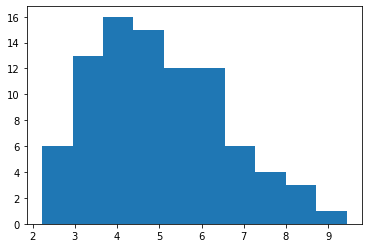

In [269]:
#plt.hist(log_dZ1)
plt.hist(dZ1)
plt.show()

In [282]:
ln_uncX1,sX1, cX1 = unc.log_normal_right_confidence_interval(dX1)
ln_uncX2,sX2, cX2 = unc.log_normal_right_confidence_interval(dX2)
ln_uncY1,sY1, cY1 = unc.log_normal_right_confidence_interval(dY1)
ln_uncY2,sY2, cY2 = unc.log_normal_right_confidence_interval(dY2)
ln_uncZ1,sZ1, cZ1 = unc.log_normal_right_confidence_interval(dZ1)
ln_uncZ2,sZ2, cZ2 = unc.log_normal_right_confidence_interval(dZ2)

In [289]:
cZ2

7.470083713757425